In [1]:
# io文件操作
import re
import os
import glob
import shutil

import numpy as np
from osgeo import gdal
import matplotlib.pyplot as plt

# NDVI时间序列插值

In [2]:
input_root = 'D:\\1GRADUATED\\paper\\downscaling_data\\Soil_moisture_downscale_czt\\NDVI\\2015_tiff'
output_root = 'D:\\1GRADUATED\\paper\\downscaling_data\\Soil_moisture_downscale_czt\\NDVI\\2015_od_tiff'
file_extension = '*.tif'

In [3]:
# 使用 glob.glob() 函数获取符合条件的文件列表
ndvi_files = glob.glob(os.path.join(input_root, file_extension))

In [4]:
for file in ndvi_files:
    # 获取文件名
    ndvi_filename = os.path.basename(file)
    
    # 从文件名中提取日期信息
    date = re.findall(r'\d+', ndvi_filename)[0]
    day = int(date.split('2015')[-1])
    start = day - 7
    end = day + 8
    start = 1 if start<1 else start
    end = 365 if end>365 else end
    
    for day in range(start, end+1):
        filename = 'NDVI2015{:03d}.tif'.format(day)
#         shutil.copy(file, os.path.join(output_root, filename))

# 按照smapid和date进行数据裁剪

In [5]:
smapid_root = 'D:\\1GRADUATED\\paper\\downscaling_data\\Soil_moisture_downscale_czt\\SMAP_Babao.tif'
smap_dataset = gdal.Open(smapid_root)
smapid_mat = []
for i in range(smap_dataset.RasterCount):

    # 获取当前波段
    band = smap_dataset.GetRasterBand(i+1)

    # 将波段数据读入 NumPy 数组
    smapid_mat = band.ReadAsArray()

print(smapid_mat)

[[-128 -128    1    2    3    4    5 -128 -128 -128 -128 -128 -128]
 [   6    7    8    9   10   11   12   13 -128 -128 -128 -128 -128]
 [  14   15   16   17   18   19   20   21   22   23 -128 -128 -128]
 [  24   25   26   27   28   29   30   31   32   33   34   35 -128]
 [-128 -128   36   37   38   39   40   41   42   43   44   45   46]
 [-128 -128 -128 -128 -128 -128   47   48   49   50   51   52   53]
 [-128 -128 -128 -128 -128 -128 -128   54   55   56   57   58 -128]]


In [6]:
input_root = 'D:\\1GRADUATED\\paper\\downscaling_data\\Soil_moisture_downscale_czt\\NDVI\\2015_od_tiff'
out_root = 'D:\\1GRADUATED\\paper\\downscaling_data\\Soil_moisture_downscale_czt\\DATASET\\AB\\INPUT\\NDVI\\GRID'
file_extension = '*.tif'

In [7]:
# 使用 glob.glob() 函数获取符合条件的文件列表
ndvi_files = glob.glob(os.path.join(input_root, file_extension))

2015001
2015002
2015003
2015004
2015005
2015006
2015007
2015008
2015009
2015010
2015011
2015012
2015013
2015014
2015015
2015016
2015017
2015018
2015019
2015020
2015021
2015022
2015023
2015024
2015025
2015026
2015027
2015028
2015029
2015030
2015031
2015032
2015033
2015034
2015035
2015036
2015037
2015038
2015039
2015040
2015041
2015042
2015043
2015044
2015045
2015046
2015047
2015048
2015049
2015050
2015051
2015052
2015053
2015054
2015055
2015056
2015057
2015058
2015059
2015060
2015061
2015062
2015063
2015064
2015065
2015066
2015067
2015068
2015069
2015070
2015071
2015072
2015073
2015074
2015075
2015076
2015077
2015078
2015079
2015080
2015081
2015082
2015083
2015084
2015085
2015086
2015087
2015088
2015089
2015090
2015091
2015092
2015093
2015094
2015095
2015096
2015097
2015098
2015099
2015100
2015101
2015102
2015103
2015104
2015105
2015106
2015107
2015108
2015109
2015110
2015111
2015112
2015113
2015114
2015115
2015116
2015117
2015118
2015119
2015120
2015121
2015122
2015123
2015124
2015125


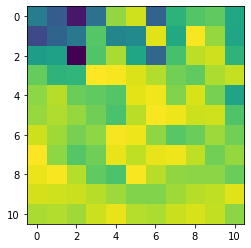

In [14]:
for file in ndvi_files:
    
    # 保存路径
    ndvi_filename = os.path.basename(file)
    date = re.findall(r'\d+', ndvi_filename)[0]
    print(date)
    save_dir = os.path.join(out_root, date)
    
    # 创建保存目录
    if os.path.exists(save_dir)==False:
        os.makedirs(save_dir, exist_ok=True)
    
    # 使用 GDAL 库打开文件
    dataset = gdal.Open(file)
    
    # 获取当前波段
    band = dataset.GetRasterBand(1)
    
    # 将波段数据读入 NumPy 数组
    data = band.ReadAsArray()
    
    # rescaling
    data = data * 0.0001
    
    # 裁剪边界
    data = data[1:78, 0:143]
#     print(data)
    data = data.reshape((data.shape[0], data.shape[1], 1))
#     print(data)
    
    # 遍历cell
    for i in range(7):
        for j in range(13):
            cell = data[i*11:i*11+11, j*11:j*11+11]
            if smapid_mat[i][j]!=-128:
                # 展示有效数据
                plt.imshow(cell)
#                 plt.show()
                path = os.path.join(save_dir, str(smapid_mat[i][j]))
                np.save(path, cell)
    #关闭数据集
    dataset = None